In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [112]:
fmnist_b = pd.read_csv('wandb_export_2023-07-11_fmnist_baseline.csv')

In [113]:
fmnist_b = fmnist_b[fmnist_b.columns.drop(list(fmnist_b.filter(regex='__MAX')))]
fmnist_b = fmnist_b[fmnist_b.columns.drop(list(fmnist_b.filter(regex='__MIN')))]
fmnist_b.columns

aggregation_list = ["Krum", "FedAvg", "TrimmedMean", "FlTrust", "Sentinel", "SentinelGlobal"]
clean = pd.DataFrame(data=None, index=range(0,11), columns=aggregation_list, dtype=None, copy=None)

round = range(0,11)
clean['round'] = round


for aggregator in aggregation_list:
    vals = fmnist_b.filter(regex=(f'{aggregator}_')).dropna()
    vals = vals.reset_index().iloc[:, 1]
    clean[aggregator] = vals
clean = clean.reindex(sorted(clean.columns), axis=1)
print(clean)

      FedAvg   FlTrust      Krum  Sentinel  SentinelGlobal  TrimmedMean  round
0   0.097742  0.070946  0.096048  0.060548        0.095575     0.084926      0
1   0.793827  0.788046  0.764330  0.786934        0.784996     0.794748      1
2   0.819592  0.819421  0.813952  0.801917        0.803219     0.823854      2
3   0.829114  0.825384  0.816131  0.822595        0.827397     0.832202      3
4   0.837731  0.834595  0.811378  0.835412        0.833824     0.837033      4
5   0.842794  0.837359  0.822328  0.839054        0.839339     0.841815      5
6   0.844351  0.842664  0.831428  0.840911        0.843160     0.843717      6
7   0.849133  0.847849  0.824302  0.845059        0.844147     0.844705      7
8   0.851701  0.849705  0.834951  0.848784        0.848559     0.850443      8
9   0.853315  0.848117  0.835190  0.845409        0.848409     0.848516      9
10  0.853905  0.853469  0.839995  0.849918        0.847150     0.850937     10


In [136]:
df = clean.transpose().drop('round')
df[10]

FedAvg            0.853905
FlTrust           0.853469
Krum              0.839995
Sentinel          0.849918
SentinelGlobal    0.847150
TrimmedMean       0.850937
Name: 10, dtype: float64

Text(0, 0.5, 'F1-Score')

<Figure size 640x480 with 0 Axes>

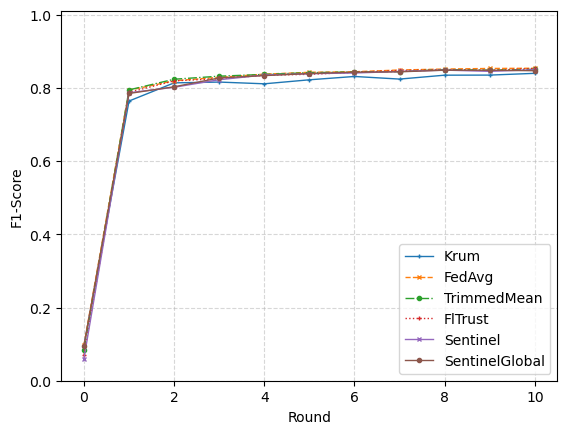

In [130]:
marker_styles = ['+', 'x', 'o']
line_styles = ['-', '--', '-.', ':', '-']
fig = plt.figure()
ax = None
for i, aggregator in enumerate(aggregation_list):
    ax = clean.plot(x='round',
                      y=aggregator,
                      #yerr=error,
                      marker=marker_styles[i % len(marker_styles)],
                      markersize=3,
                      linestyle=line_styles[i % len(line_styles)],
                      linewidth=1,
                      label=aggregator,
                      ax=ax)
plt.ylim(0.0, 1.01)
plt.xlim(-0.5,10.5)
# Set legend
plt.legend(fontsize=10)
# Set grid
plt.grid(True, linestyle='--', alpha=0.5)
#ax.minorticks_on()
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Increase tick font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Round")
plt.ylabel("F1-Score")